#                              Airline Review

### Download and Import Requirements

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
import re
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk 
import numpy as np
nltk.download('words')
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\wangj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wangj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wangj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wangj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Airline Review Analysis

## 1. Read reviews 

In [2]:
#read first dataset
df_dtype1 = {'airline':str,
            'overall':'Int64',
            'author':str,
            'review_date':str,
            'customer_review':str,
            'aircraft':str,
            'traveller_type':str,
            'cabin':str,
            'route':str,
            'date_flown':str,
            'seat_comfort':'Int64',
            'cabin_service':'Int64',
            'food_bev':'Int64',
            'entertainment':'Int64',
            'ground_service':'Int64',
            'value_for_money':'Int64',
            'recommended':str,
           }
df_dataset1 = pd.read_excel("../data/dataset/capstone_airline_reviews3.xlsx", dtype=df_dtype1)

df_dataset1[:2]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1,Turkish Airlines,7,Christopher Hackley,8th May 2019,"âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are very good, ground staff and call centre staff need better training and they all need better computer systems and software to work with.",NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4,5,4,4,2,4,yes


In [3]:
#read second dataset
df_dtype2 = {'airline_name':str,
            'link':str,
            'title':str,
            'author':str,
            'author_country':str,
            'date':str,
            'content':str,
            'aircraft':str,
            'type_traveller':str,
            'cabin_flown':str,
            'route':str,
            'overall_rating':'Int64',
            'seat_comfort_rating':'Int64',
            'cabin_staff_rating':'Int64',
            'food_beverages_rating':'Int64',
            'inflight_entertainment_rating':'Int64',
            'ground_service_rating':'Int64',
            'wifi_connectivity_rating':'Int64',
            'value_money_rating':'Int64',
            'recommended':str,
           }
df_dataset2 = pd.read_csv("../data/dataset/airline.csv", dtype=df_dtype2)
df_dataset2[:1]

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,NaN,NaN,Economy,NaN,7,4,4,4,0,<NA>,<NA>,4,1


## 2. Data Cleaning & Tokenization 

### a. Clean review content and airline

In [4]:
df_dataset1 = df_dataset1[df_dataset1['airline'].notna()].copy()
# Split the string by the first occurrence of '.' and get the second part of the string.
df_dataset1['customer_review'] = df_dataset1['customer_review'].str.split('.',n=1,expand=True)[1]
# Convert the titles to lowercase
df_dataset1['airline'] = df_dataset1['airline'].map(lambda x: x.lower())
df_dataset1[:1]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,turkish airlines,7,Christopher Hackley,8th May 2019,"First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are very good, ground staff and call centre staff need better training and they all need better computer systems and software to work with.",NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4,5,4,4,2,4,yes


### b. modify column names and values to Normalize datasets

In [5]:
df_dataset2 = df_dataset2.rename(columns={'airline_name': 'airline', 
                                        'date': 'review_date', 
                                        'content': 'customer_review', 
                                        'type_traveller': 'traveller_type', 
                                        'cabin_flown':'cabin', 
                                        'overall_rating':'overall', 
                                        'seat_comfort_rating':'seat_comfort',
                                        'cabin_staff_rating':'cabin_service',
                                        'food_beverages_rating':'food_bev',
                                        'ground_service_rating':'ground_service',
                                        'inflight_entertainment_rating':'entertainment',
                                        'value_money_rating':'value_for_money'})

df_dataset2.drop(columns=['link','title','author','author_country','aircraft','route','wifi_connectivity_rating','seat_comfort','cabin_service','food_bev','ground_service','entertainment','value_for_money'], inplace=True)
# change the datetime format
df_dataset2['review_date'] = pd.to_datetime(df_dataset2['review_date'])
# relocate 'overall' column
df_dataset2['airline'] = df_dataset2['airline'].replace('-', ' ', regex=True).astype(str)
df_dataset2 =df_dataset2.replace({'recommended': {'1': True, '0': False}})
print("df_dataset2 shape is {}".format(df_dataset2.shape))


# Drop the author field as we don't need it.
# The columns 'route' are ambiguous in the sense that these columns contain a mix of airport city, airport name and airport codes. So we need to remove these columns.
df_dataset1.drop(columns=['author','aircraft','route','date_flown','seat_comfort','cabin_service','food_bev','ground_service','entertainment','value_for_money'], inplace=True)
# change the datetime format
df_dataset1['review_date'] = pd.to_datetime(df_dataset1['review_date'])
# relocate 'overall' column
col = df_dataset1.pop("overall")
df_dataset1.insert(5, col.name, col)
df_dataset1 = df_dataset1.replace({'recommended': {'yes': True, 'no': False}})
print("df_dataset1 shape is {}".format(df_dataset1.shape))

# df = pd.concat([df_dataset1, df_dataset2], ignore_index=True)

df_dataset2 shape is (41396, 7)
df_dataset1 shape is (65947, 7)


In [6]:
df_dataset2[:1]

,airline,review_date,customer_review,traveller_type,cabin,overall,recommended
0,adria airways,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,NaN,Economy,7,True


In [7]:
df_dataset1[:1]

,airline,review_date,customer_review,traveller_type,cabin,overall,recommended
1,turkish airlines,2019-05-08,"First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are very good, ground staff and call centre staff need better training and they all need better computer systems and software to work with.",Business,Economy Class,7,True


### b. remove NaN values and columns 

In [8]:
df_dataset2 = df_dataset2[df_dataset2['airline'].notna()].copy()
df_dataset2 = df_dataset2.dropna(axis=0,how='any').copy()
print("df_dataset2 shape is {}".format(df_dataset2.shape))

df_dataset1 = df_dataset1[df_dataset1['airline'].notna()].copy()
df_dataset1 = df_dataset1.dropna(axis=0,how='any').copy()
print("df_dataset1 shape is {}".format(df_dataset1.shape))
df = df_dataset1.copy()
# df.head()

df_dataset2 shape is (2366, 7)
df_dataset1 shape is (39725, 7)


### d. Create new columns in df

In [9]:
# Airlines appearing in the dataset. This is the official name of the airlines. These words should be removed from the review text.
airlines_lower = list(set(df['airline'].str.lower().unique().tolist() + df_dataset2['airline'].str.lower().unique().tolist()))
   
airlines_identifier = ['airlines', 'air lines', 'airline', 'air line', 'airways', 'air']
airlines_informal_lower = []
for airline in airlines_lower:
    found = False
    for airline_identifier in airlines_identifier:
        if found == False:
            if str(' '+airline_identifier) in airline:
                airline_informal = airline.replace(str(' '+airline_identifier),'')
                airlines_informal_lower.append(airline_informal)
                found = True

stopwords_extend = set(stopwords.words('english')+ airlines_lower + airlines_identifier + airlines_informal_lower + ['one','get','also','however','even','make', 'dont'])

tokenizer = nltk.RegexpTokenizer(r"\w+")

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
        
# Remove tabs and numbers and newlines
def clean_text(text):
    text = text.lower()
    for airline_lower in airlines_lower:
        text = text.replace(airline_lower, '')
    #remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # Remove words that contain numbers.
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Remove stop words.
    text = [word for word in text if word not in stopwords_extend]
    text = [word for word in text if len(word)>0]

    pos_tags = nltk.pos_tag(text)
    # Lemmatize the text.
    text = [WordNetLemmatizer().lemmatize(i_pos_tag[0], get_wordnet_pos(i_pos_tag[1])) for i_pos_tag in pos_tags]
    
    text = [word for word in text if len(word)>1]
    text = " ".join(text)
    # Remove non-ASCII characters.
    printable = set(string.printable)
    text = ''.join(filter(lambda x: x in printable, text))
    return text


#Input a list of bigrams, extract bigrams that form a NN-JJ pair or vice versa
def extract_nn_pairs(tokenized_list):
    found="no"
    if (tokenized_list[0][1]) == 'NN' and (tokenized_list[1][1])== 'JJ':
        found="yes"
    elif (tokenized_list[1][1]) == 'NN' and (tokenized_list[0][1])== 'JJ':
        found="yes"
    return found

# Extract bigrams and join them with _
def get_bigrams(row):
    new_list=[]
    return_bigram=""
    rows=nltk.pos_tag(row)
    if (extract_nn_pairs(rows)== "yes"):
        new_list=[ str(rows[0][0]), str(rows[1][0])]
        sorted_list=sorted(new_list)
        return_bigram=sorted_list[0]+"_"+sorted_list[1]
    return return_bigram

# Get Unigrams which are Nouns
def get_nouns(row):
    return_uni=""
    rows=nltk.pos_tag(row)
    if (str(rows[0][1])=="NN"):
        return_uni=str(rows[0][0])
    elif (str(rows[0][1])=="NN"):
        return_uni=str(rows[1][0])
    return return_uni

In [10]:
# Step 1: Clean the text
df_dataset2['customer_review'] = df_dataset2['customer_review'].apply(lambda row: clean_text(str(row)))
print("step 1")
# Step 2: Get Bigrams
df_dataset2['bigrams']=df_dataset2['customer_review'].apply(lambda row: list(ngrams(tokenizer.tokenize(row),2)  ))
print("step 2")
# Step 3: Get NN-JJ pair
df_dataset2['bigram_list']=df_dataset2['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_bigrams(i) for i in (row)])) ))
print("step 3")
# Step 4: Get NN only
df_dataset2['unigram_noun_list']=df_dataset2['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_nouns(i) for i in (row)])) ))

df_dataset2.to_csv("../data/airline_reviews_preprocessed_dataset2.csv")

step 1
step 2
step 3


In [11]:

# Step 1: Clean the text
df['customer_review'] = df['customer_review'].apply(lambda row: clean_text(str(row)))
print("step 1")
# Step 2: Get Bigrams
df['bigrams']=df['customer_review'].apply(lambda row: list(ngrams(tokenizer.tokenize(row),2)  ))
print("step 2")
# Step 3: Get NN-JJ pair
df['bigram_list']=df['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_bigrams(i) for i in (row)])) ))
print("step 3")
# Step 4: Get NN only
df['unigram_noun_list']=df['bigrams'].apply(lambda row:" ".join(list(filter(('').__ne__,[get_nouns(i) for i in (row)])) ))

df.to_csv("../data/airline_reviews_preprocessed.csv")

step 1
step 2
step 3


In [12]:
df = pd.read_csv("../data/airline_reviews_preprocessed.csv", index_col=None)
df[:1]

,Unnamed: 0,airline,review_date,customer_review,traveller_type,cabin,overall,recommended,bigrams,bigram_list,unigram_noun_list
0,1,turkish airlines,2019-05-08,first time id flown tk find good cabin crew plane food nice great ground ground staff call centre computer system flight lhr delay miss connection istanbul ground staff dont speak english give contradictory instruction could speak little english eventually get flight izmir three hour later wasnt easy process make bad vast distance walk gate cavernous new airport id phone tk call centre base ukraine pay extra way extra leg room seat departure time keep change seat keep change return leg london istanbul give extra leg room seat luckily spare exit row seat cabin crew sort overall think cabin crew plane good ground staff call centre staff need good train need good computer system software work,Business,Economy Class,7,True,"[('first', 'time'), ('time', 'id'), ('id', 'flown'), ('flown', 'tk'), ('tk', 'find'), ('find', 'good'), ('good', 'cabin'), ('cabin', 'crew'), ('crew', 'plane'), ('plane', 'food'), ('food', 'nice'), ('nice', 'great'), ('great', 'ground'), ('ground', 'ground'), ('ground', 'staff'), ('staff', 'call'), ('call', 'centre'), ('centre', 'computer'), ('computer', 'system'), ('system', 'flight'), ('flight', 'lhr'), ('lhr', 'delay'), ('delay', 'miss'), ('miss', 'connection'), ('connection', 'istanbul'), ('istanbul', 'ground'), ('ground', 'staff'), ('staff', 'dont'), ('dont', 'speak'), ('speak', 'english'), ('english', 'give'), ('give', 'contradictory'), ('contradictory', 'instruction'), ('instruction', 'could'), ('could', 'speak'), ('speak', 'little'), ('little', 'english'), ('english', 'eventually'), ('eventually', 'get'), ('get', 'flight'), ('flight', 'izmir'), ('izmir', 'three'), ('three', 'hour'), ('hour', 'later'), ('later', 'wasnt'), ('wasnt', 'easy'), ('easy', 'process'), ('process', 'make'), ('make', 'bad'), ('bad', 'vast'), ('vast', 'distance'), ('distance', 'walk'), ('walk', 'gate'), ('gate', 'cavernous'), ('cavernous', 'new'), ('new', 'airport'), ('airport', 'id'), ('id', 'phone'), ('phone', 'tk'), ('tk', 'call'), ('call', 'centre'), ('centre', 'base'), ('base', 'ukraine'), ('ukraine', 'pay'), ('pay', 'extra'), ('extra', 'way'), ('way', 'extra'), ('extra', 'leg'), ('leg', 'room'), ('room', 'seat'), ('seat', 'departure'), ('departure', 'time'), ('time', 'keep'), ('keep', 'change'), ('change', 'seat'), ('seat', 'keep'), ('keep', 'change'), ('change', 'return'), ('return', 'leg'), ('leg', 'london'), ('london', 'istanbul'), ('istanbul', 'give'), ('give', 'extra'), ('extra', 'leg'), ('leg', 'room'), ('room', 'seat'), ('seat', 'luckily'), ('luckily', 'spare'), ('spare', 'exit'), ('exit', 'row'), ('row', 'seat'), ('seat', 'cabin'), ('cabin', 'crew'), ('crew', 'sort'), ('sort', 'overall'), ('overall', 'think'), ('think', 'cabin'), ('cabin', 'crew'), ('crew', 'plane'), ('plane', 'good'), ('good', 'ground'), ('ground', 'staff'), ('staff', 'call'), ('call', 'centre'), ('centre', 'staff'), ('staff', 'need'), ('need', 'good'), ('good', 'train'), ('train', 'need'), ('need', 'good'), ('good', 'computer'), ('computer', 'system'), ('system', 'software'), ('software', 'work')]",first_time cabin_good great_ground connection_miss english_give easy_process bad_vast distance_vast cavernous_gate airport_new pay_ukraine extra_way extra_way extra_leg extra_leg exit_spare overall_think good_plane good_ground centre_staff good_train computer_good,time tk cabin crew plane food ground ground staff call centre computer system flight lhr delay connection istanbul ground staff dont contradictory instruction flight hour wasnt process distance walk gate airport id phone tk call centre base pay way leg room seat departure time change seat change return leg london leg room seat exit row seat cabin crew sort think cabin crew plane ground staff call staff train computer system software


## 3. Extracting Topics and Keywords
Use bigram list and TF-IDF to extract topics and keywords.

In [13]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]  
    return results

### a. Extract top n bigrams

In [14]:
df = df.reset_index(drop=True)
cv=CountVectorizer(max_df=0.85,stop_words=stopwords_extend,max_features=10000)
word_count_vector=cv.fit_transform(df["bigram_list"].values.astype('U'))
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
feature_names=cv.get_feature_names()
tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df["bigram_list"])]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n
keywords=extract_topn_from_vector(feature_names,sorted_items,20) 
keywords

C:\Users\wangj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aer', 'aereas', 'aeroflot', 'aerolineas', 'african', 'al', 'algerie', 'america', 'ana', 'angkor', 'arabia', 'arabian', 'argentinas', 'arkia', 'asia', 'astana', 'atlantic', 'australia', 'aviacin', 'aviation', 'azores', 'azul', 'ba', 'bangladesh', 'barbara', 'belgium', 'berlin', 'biman', 'bmi', 'boliviana', 'brasil', 'brasileiras', 'brunei', 'cambodia', 'canada', 'cathay', 'cebu', 'cityflyer', 'colombia', 'com', 'compagnie', 'cook', 'country', 'customer', 'de', 'dolomiti', 'dutch', 'eagle', 'el', 'europa', 'express', 'france', 'garuda', 'hong', 'india', 'indonesia', 'international', 'intl', 'israel', 'israeli', 'jet2', 'jordanian', 'klm', 'kong', 'la', 'line', 'lines', 'lingus', 'linhas', 'lot', 'malta', 'maroc', 'mauritius', 'miat', 'moldova', 'mongolian', 'ne

{'airport_new': 0.292,
 'extra_way': 0.222,
 'good_ground': 0.203,
 'extra_leg': 0.166,
 'poor_quality': 0.163,
 'bad_flight': 0.14,
 'flight_last': 0.132,
 'flight_inexpensive': 0.125,
 'aircraft_regional': 0.125,
 'plenty_tasty': 0.124,
 'cheap_company': 0.124,
 'economy_premium': 0.124,
 'level_new': 0.123,
 'economy_empty': 0.123,
 'cheapest_next': 0.123,
 'english_give': 0.121,
 'miserable_staff': 0.119,
 'great_ground': 0.118,
 'overall_think': 0.117,
 'big_mess': 0.117}

## 4. Visualize Bigrams using Wordcloud

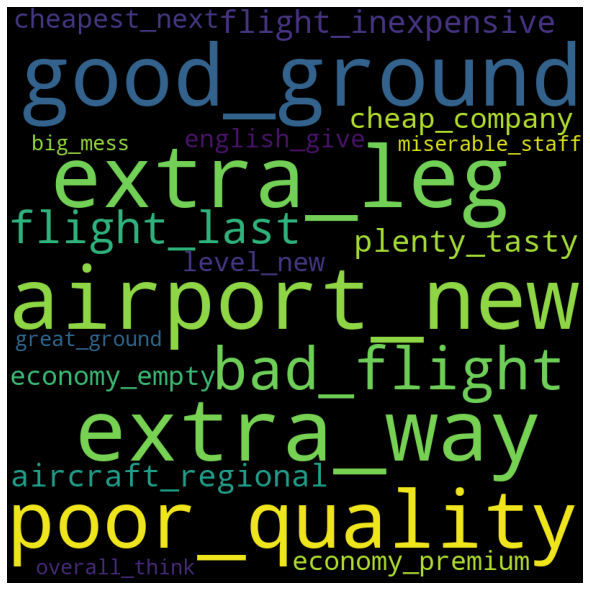

In [15]:
comment_words=""
for k in keywords:
    comment_words+=" "+str(k)        
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords_extend, 
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('airline_review_bigram_wordcloud.png')
plt.show() 

## 5. Sentiment Classifier

### a. Using Ratings to assign sentiment and Train Classifier
We dont have sentiment labels for any of the reviews dataset but we do have ratings for airline Reviews. In this part we will use ratings to create a sentiment column for  reviews and train our classifier on these review-sentiment. We will later use this classifier to label our Airbnb aspects.

In [16]:
# - 'pos' if the review score is positive (>=7),
# - 'neu' if the review score is neutral (5 or 6),
# - 'neg' if the review score is negative (<=4).
def rate_sent(val):
    if val>=7:
        return "pos"
    elif val<=4:
        return "neg"
    else:
        return "neu"
# we use overall score to generate sentiment rating
df['sentiment_rating']=df['overall'].apply(lambda row: rate_sent(int(row)))

In [17]:
df[:1]

,Unnamed: 0,airline,review_date,customer_review,traveller_type,cabin,overall,recommended,bigrams,bigram_list,unigram_noun_list,sentiment_rating
0,1,turkish airlines,2019-05-08,first time id flown tk find good cabin crew plane food nice great ground ground staff call centre computer system flight lhr delay miss connection istanbul ground staff dont speak english give contradictory instruction could speak little english eventually get flight izmir three hour later wasnt easy process make bad vast distance walk gate cavernous new airport id phone tk call centre base ukraine pay extra way extra leg room seat departure time keep change seat keep change return leg london istanbul give extra leg room seat luckily spare exit row seat cabin crew sort overall think cabin crew plane good ground staff call centre staff need good train need good computer system software work,Business,Economy Class,7,True,"[('first', 'time'), ('time', 'id'), ('id', 'flown'), ('flown', 'tk'), ('tk', 'find'), ('find', 'good'), ('good', 'cabin'), ('cabin', 'crew'), ('crew', 'plane'), ('plane', 'food'), ('food', 'nice'), ('nice', 'great'), ('great', 'ground'), ('ground', 'ground'), ('ground', 'staff'), ('staff', 'call'), ('call', 'centre'), ('centre', 'computer'), ('computer', 'system'), ('system', 'flight'), ('flight', 'lhr'), ('lhr', 'delay'), ('delay', 'miss'), ('miss', 'connection'), ('connection', 'istanbul'), ('istanbul', 'ground'), ('ground', 'staff'), ('staff', 'dont'), ('dont', 'speak'), ('speak', 'english'), ('english', 'give'), ('give', 'contradictory'), ('contradictory', 'instruction'), ('instruction', 'could'), ('could', 'speak'), ('speak', 'little'), ('little', 'english'), ('english', 'eventually'), ('eventually', 'get'), ('get', 'flight'), ('flight', 'izmir'), ('izmir', 'three'), ('three', 'hour'), ('hour', 'later'), ('later', 'wasnt'), ('wasnt', 'easy'), ('easy', 'process'), ('process', 'make'), ('make', 'bad'), ('bad', 'vast'), ('vast', 'distance'), ('distance', 'walk'), ('walk', 'gate'), ('gate', 'cavernous'), ('cavernous', 'new'), ('new', 'airport'), ('airport', 'id'), ('id', 'phone'), ('phone', 'tk'), ('tk', 'call'), ('call', 'centre'), ('centre', 'base'), ('base', 'ukraine'), ('ukraine', 'pay'), ('pay', 'extra'), ('extra', 'way'), ('way', 'extra'), ('extra', 'leg'), ('leg', 'room'), ('room', 'seat'), ('seat', 'departure'), ('departure', 'time'), ('time', 'keep'), ('keep', 'change'), ('change', 'seat'), ('seat', 'keep'), ('keep', 'change'), ('change', 'return'), ('return', 'leg'), ('leg', 'london'), ('london', 'istanbul'), ('istanbul', 'give'), ('give', 'extra'), ('extra', 'leg'), ('leg', 'room'), ('room', 'seat'), ('seat', 'luckily'), ('luckily', 'spare'), ('spare', 'exit'), ('exit', 'row'), ('row', 'seat'), ('seat', 'cabin'), ('cabin', 'crew'), ('crew', 'sort'), ('sort', 'overall'), ('overall', 'think'), ('think', 'cabin'), ('cabin', 'crew'), ('crew', 'plane'), ('plane', 'good'), ('good', 'ground'), ('ground', 'staff'), ('staff', 'call'), ('call', 'centre'), ('centre', 'staff'), ('staff', 'need'), ('need', 'good'), ('good', 'train'), ('train', 'need'), ('need', 'good'), ('good', 'computer'), ('computer', 'system'), ('system', 'software'), ('software', 'work')]",first_time cabin_good great_ground connection_miss english_give easy_process bad_vast distance_vast cavernous_gate airport_new pay_ukraine extra_way extra_way extra_leg extra_leg exit_spare overall_think good_plane good_ground centre_staff good_train computer_good,time tk cabin crew plane food ground ground staff call centre computer system flight lhr delay connection istanbul ground staff dont contradictory instruction flight hour wasnt process distance walk gate airport id phone tk call centre base pay way leg room seat departure time change seat change return leg london leg room seat exit row seat cabin crew sort think cabin crew plane ground staff call staff train computer system software,pos


### b. Train a Model for Sentimenet Classification 
We use Logistic Regression classifier and our updated hotel review dataset to train

In [18]:
reviews = df['customer_review'].values.astype('U')
labels = df['sentiment_rating'].values.astype('U')

df.to_csv("../data/airline_reviews_preprocessed.csv")

reviews_train, reviews_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.33, random_state=2000)
vectorizer=CountVectorizer(max_df=0.85,stop_words=stopwords_extend,max_features=10000)
vectorizer.fit(reviews_train)

X_train = vectorizer.transform(reviews_train)
X_test = vectorizer.transform(reviews_test)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)

C:\Users\wangj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aer', 'aereas', 'aeroflot', 'aerolineas', 'african', 'al', 'algerie', 'america', 'ana', 'angkor', 'arabia', 'arabian', 'argentinas', 'arkia', 'asia', 'astana', 'atlantic', 'australia', 'aviacin', 'aviation', 'azores', 'azul', 'ba', 'bangladesh', 'barbara', 'belgium', 'berlin', 'biman', 'bmi', 'boliviana', 'brasil', 'brasileiras', 'brunei', 'cambodia', 'canada', 'cathay', 'cebu', 'cityflyer', 'colombia', 'com', 'compagnie', 'cook', 'country', 'customer', 'de', 'dolomiti', 'dutch', 'eagle', 'el', 'europa', 'express', 'france', 'garuda', 'hong', 'india', 'indonesia', 'international', 'intl', 'israel', 'israeli', 'jet2', 'jordanian', 'klm', 'kong', 'la', 'line', 'lines', 'lingus', 'linhas', 'lot', 'malta', 'maroc', 'mauritius', 'miat', 'moldova', 'mongolian', 'ne

LogisticRegression(max_iter=500)

In [19]:
accuracy = classifier.score(X_test, y_test)
print("Accuracy of the Sentiment Classifier is {}".format(accuracy))

Accuracy of the Sentiment Classifier is 0.8579710144927536


### c. (Optional- Reviewer Testing) Save and load the model 

In [20]:
from joblib import dump, load
dump(classifier, 'sentiment_analyzer.joblib') 

['sentiment_analyzer.joblib']

In [21]:
# classifier = load('sentiment_analyzer.joblib')
# classifier.predict(X)

## 6. Plot sentiment and aspects
Visualize Keyword Topics, Sentiment and their importance

### a. Run TF-IDF on nouns
These noun will be our aspects

In [22]:

cv=CountVectorizer(max_df=0.85,stop_words=stopwords_extend,max_features=20000)
word_count_vector=cv.fit_transform(df["unigram_noun_list"].values.astype('U'))

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

feature_names=cv.get_feature_names()
tf_idf_vector=tfidf_transformer.transform(cv.transform([str(df["unigram_noun_list"])]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,100)
#generate tf-idf for the given document
keywords

C:\Users\wangj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aer', 'aereas', 'aeroflot', 'aerolineas', 'african', 'al', 'algerie', 'america', 'ana', 'angkor', 'arabia', 'arabian', 'argentinas', 'arkia', 'asia', 'astana', 'atlantic', 'australia', 'aviacin', 'aviation', 'azores', 'azul', 'ba', 'bangladesh', 'barbara', 'belgium', 'berlin', 'biman', 'bmi', 'boliviana', 'brasil', 'brasileiras', 'brunei', 'cambodia', 'canada', 'cathay', 'cebu', 'cityflyer', 'colombia', 'com', 'compagnie', 'cook', 'country', 'customer', 'de', 'dolomiti', 'dutch', 'eagle', 'el', 'europa', 'express', 'france', 'garuda', 'hong', 'india', 'indonesia', 'international', 'intl', 'israel', 'israeli', 'jet2', 'jordanian', 'klm', 'kong', 'la', 'line', 'lines', 'lingus', 'linhas', 'lot', 'malta', 'maroc', 'mauritius', 'miat', 'moldova', 'mongolian', 'ne

{'kiev': 0.303,
 'flight': 0.256,
 'airport': 0.195,
 'istanbul': 0.189,
 'time': 0.17,
 'crew': 0.168,
 'cabin': 0.167,
 'staff': 0.162,
 'ground': 0.15,
 'ist': 0.145,
 'leg': 0.141,
 'seat': 0.141,
 'uia': 0.137,
 'food': 0.121,
 'interface': 0.114,
 'economy': 0.111,
 'jfk': 0.11,
 'sir': 0.107,
 'room': 0.101,
 'tk': 0.1,
 'experience': 0.094,
 'passenger': 0.094,
 'hurry': 0.093,
 'delay': 0.093,
 'mumbai': 0.091,
 'centre': 0.089,
 'gate': 0.088,
 'company': 0.087,
 'return': 0.087,
 'route': 0.086,
 'prepare': 0.086,
 'maintain': 0.084,
 'mediocre': 0.082,
 'quality': 0.082,
 'computer': 0.081,
 'prishtina': 0.077,
 'personification': 0.077,
 'pay': 0.075,
 'per': 0.075,
 'train': 0.074,
 'land': 0.074,
 'cup': 0.074,
 'hour': 0.073,
 'emit': 0.071,
 'call': 0.071,
 'squeal': 0.069,
 'liter': 0.069,
 'object': 0.068,
 'plane': 0.068,
 'service': 0.066,
 'kbp': 0.066,
 'oclock': 0.065,
 'ask': 0.065,
 'contradictory': 0.065,
 'bring': 0.064,
 'walk': 0.064,
 'aloof': 0.064,
 'co

### b. Attach sentiment to each aspect

In [23]:
list_outer=[]
for k in keywords:
    list_inner=[]
    X_new = vectorizer.transform([" ".join(k.split("_"))])
    list_inner.append(" ".join(k.split("_")))
    list_inner.append(str(classifier.predict(X_new)[0]))
    list_inner.append(keywords[k])
    list_outer.append(list_inner)

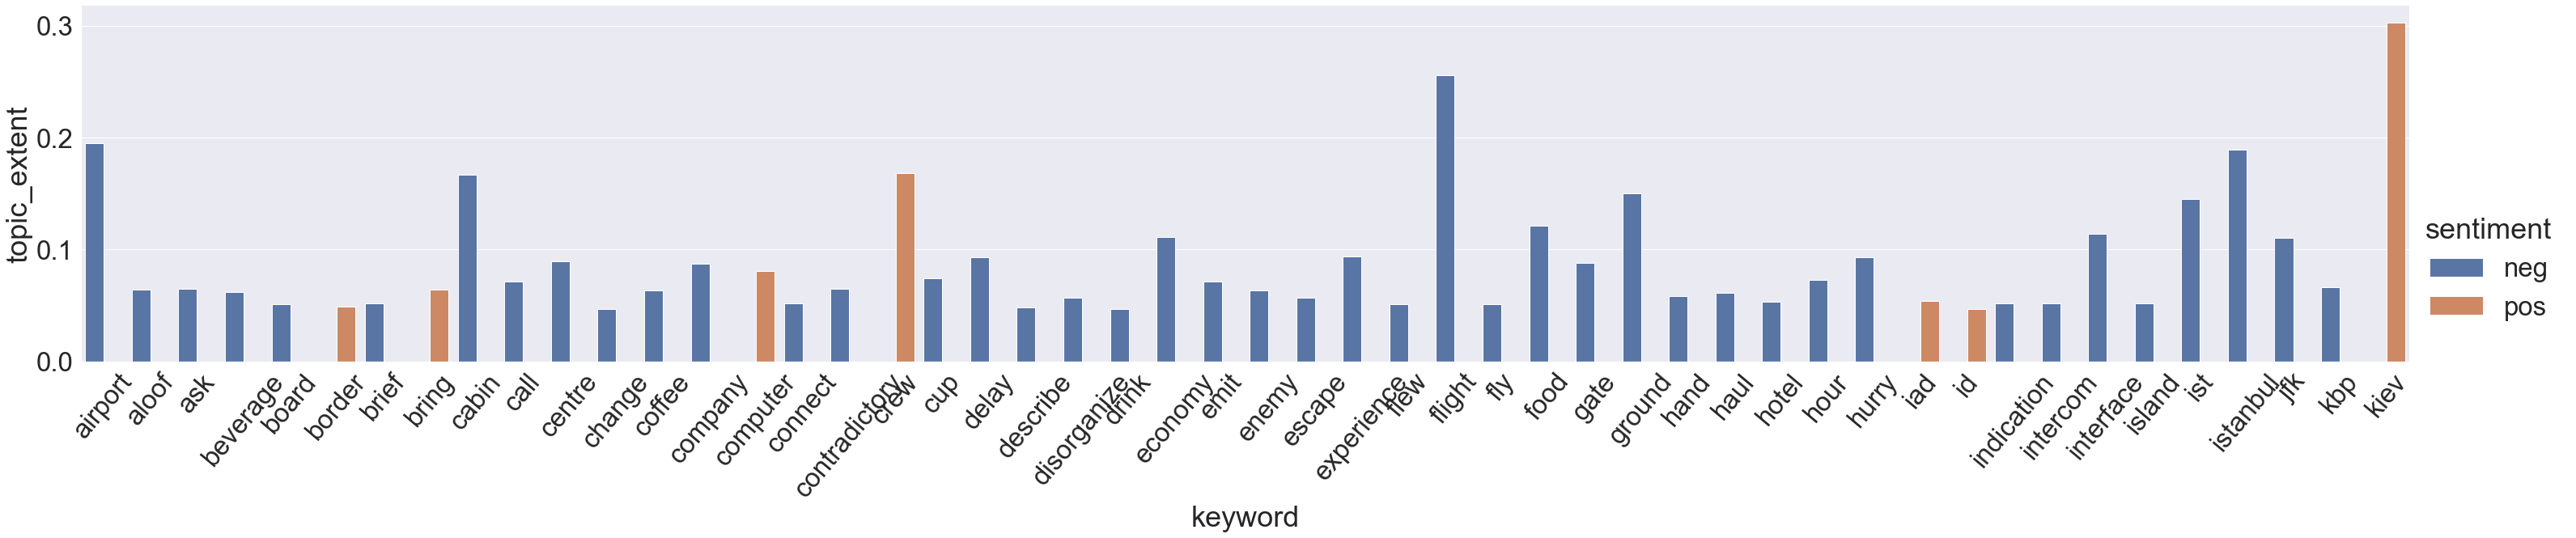

In [24]:
import seaborn as sns
from matplotlib import rcParams
sns.set(font_scale=3)
# figure size in inches
rcParams['figure.figsize'] = 300,200
my_np_array=np.array(sorted(list_outer)[:50])
my_np_array=my_np_array.reshape(50,3)
df_plot = pd.DataFrame(my_np_array, columns=['keyword','sentiment','topic_extent'])
df_plot=df_plot.astype({'topic_extent': 'float'})
plot=sns.catplot(x="keyword", y="topic_extent", hue="sentiment",kind="bar", data=df_plot, height=8.27, aspect=11.7/2.27)
plot.set_xticklabels(rotation=50)
plot.savefig("Airline_Aspectsentiment.png")
